## 欠測データへの対処

In [1]:
import pandas as pd
from io import StringIO

# sampledate create
csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              10.0,11.0,12.0'''

# Sampledata read
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
# 各特徴量の欠測値をカウント
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

scikit-learnはNumpyの配列に対応するように開発されたいるが、データの前処理においてはpandasのDataFrameクラスを使用するほうが便利なことがある。scikit-learnの推定器に入力される前のDataFrameオブジェクトはNumpyの配列である、values属性を使っていつでもアクセスできる。

#### データの処理においてはpandasのほうが便利な機能があるからだと思う。

In [3]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

## 欠測値をもつサンプル/特徴量を取り除く

In [4]:
# 欠測値を含む行を削除
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
# 欠測値を含む列を削除
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
# すべて列がNaNである行だけ削除
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# 非NaN値が4つ未満の行を削除
print(df.dropna(thresh=4))

     A    B    C    D
0  1.0  2.0  3.0  4.0


In [8]:
# 特定の列に（この場合はC）にNaNが含まれている行だけ削除
print(df.dropna(subset=['C']))

      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


#### 有益な情報を削除しないよう注意！

## 欠測値を補完する。

In [9]:
from sklearn.preprocessing import Imputer

# 欠測値補完のインスタンスを生成(平均値補完）
imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
# データを適合
imr = imr.fit(df.values)

# 補完を実行
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

strategy引数 = 'median'(中央値)、'most_frequent'(最頻値)

## カテゴリデータの処理

In [10]:
import pandas as pd

# sample data create
df = pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']])

# 列名を設定
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## 順序特徴量のマッピング

In [11]:
# Tシャツのサイズと整数を対応させるディクショナリを生成
size_mapping = {'XL':3,'L':2,'M':1}
# Tシャツのサイズを整数に変換
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [12]:
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## クラスラベルのエンコーディング

In [13]:
import numpy as np

# class labelと整数を対応させるディクショナリを生成
class_mapping = {label:idx for idx ,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [15]:
inv_class_mapping = { v:k for k,v in class_mapping.items()}
df['classlabel']= df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [16]:
from sklearn.preprocessing import  LabelEncoder
# ラベルエンコーダのインスタンスを生成
class_le = LabelEncoder()
# クラスラベルから整数に変換
y = class_le.fit_transform(df['classlabel'])
y

array([0, 1, 0], dtype=int64)

In [17]:
# クラスラベルを元に戻す
class_le.inverse_transform(y)

C:\Users\zundo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

## 名義特徴量でのone-hot エンコーディング

In [18]:
# Tシャツの色、サイズ、価格を抽出
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder

# One-hotエンコーダの作成
ohe = OneHotEncoder(categorical_features=[0])
# one-hot エンコーディング実施
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [20]:
print(ohe.fit_transform(X))
# toarrayの呼び出しを省略したい場合は,OneHotEncoderの(spars=False)にする
ohe1 = OneHotEncoder(categorical_features=[0],sparse=False)
print(ohe1.fit_transform(X))

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (0, 3)	1.0
  (0, 4)	10.1
  (1, 3)	2.0
  (1, 4)	13.5
  (2, 3)	3.0
  (2, 4)	15.3
[[ 0.   1.   0.   1.  10.1]
 [ 0.   0.   1.   2.  13.5]
 [ 1.   0.   0.   3.  15.3]]


In [21]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


one-hotエンコーディングをすると特徴量が増え、逆行列の計算が多くなり不安定な予測になることがある。そういう場合は特徴量の列を1つ削除する。

In [22]:
pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [23]:
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:,1:]

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

## データセットをトレニンーグデータセットとテストデータセットに分割する

In [24]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                     header=None)
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash',
                  'Alcalinity of ash','Magnesium','Total phenols','Flavanoisds',
                   'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
                  'OD280/OD315 of siluted wines','Proline']

print('Class label',np.unique(df_wine['Class label']))
df_wine.head()

Class label [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoisds,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of siluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
from sklearn.model_selection import train_test_split
# 特徴量とクラスラベルを別々に抽出
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

# トレーニングデータとテストデータに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0,stratify=y)

## 特徴量の尺度をそろえる
- 決定木とランダムフォレストにはいらない
- 機械学習と最適化のアルゴリズムの大半は、複数の特徴量の尺度が同じである場合にははるかにうまく動作する。

特徴量の尺度をそろえる一般的な方法として、**正規化(normalization)**と**標準化(standardization)**がある
- 正規化は特徴量を[０～１]の範囲にする
- 標準化は平均値:0、標準偏差:1にする。重みを学習しやすくし、外れ値に関する有益な情報が維持される。つまり外れ値から受ける影響が少なくなる。

In [26]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [27]:
ex = np.array([0,1,2,3,4,5])
print('Standardized:',(ex-ex.mean())/ex.std())

print('Normalized:',(ex-ex.mean())/ex.max()-ex.min())

Standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalized: [-0.5 -0.3 -0.1  0.1  0.3  0.5]


In [28]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

## 有益な特徴量の選択
汎化誤差を減らすためにに一般的な方法は以下の通りである。
- さらに多くのトレニンーグデータを集める
- 正規化を通じて複雑さにペナルティを科す
- パラメータの数が少ない、より単純なモデルを選択する
- データの次元を減らす

In [29]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty=1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty=1, random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# L1正規化ロジスティクス回帰のインスタンスを生成
lr = LogisticRegression(penalty='l1',C=1.0)
lr.fit(X_train_std,y_train)
print('Training accuracy:',lr.score(X_train_std,y_train))

print('Test accuracy:',lr.score(X_test_std,y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [31]:
# 切片の表示
lr.intercept_

array([-1.26348321, -1.21566996, -2.37017278])

In [32]:
#　重み係数の表示
lr.coef_

array([[ 1.24563059,  0.18035243,  0.74524928, -1.16275313,  0.        ,
         0.        ,  1.16403785,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55336952,  2.50966101],
       [-1.53895009, -0.3857106 , -0.99563878,  0.36387537, -0.05883531,
         0.        ,  0.66697962,  0.        ,  0.        , -1.93199134,
         1.23806354,  0.        , -2.23298003],
       [ 0.13573042,  0.1682876 ,  0.35713058,  0.        ,  0.        ,
         0.        , -2.43852513,  0.        ,  0.        ,  1.56394035,
        -0.81900508, -0.49196663,  0.        ]])

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue','green','red','cyan','magenta','yellow','black',
        'pink','lightgreen','lightblue','gray','indigo','orange']

weights,params =[],[]
for c in np.arange(-4,6.):
    lr = LogisticRegression(penalty='l1',C=10.**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
# 各重み係数をプロット
for column,color in zip(range(weights.shape[1]),colors):
    # 横軸を逆正規化したパラメータ、縦軸を重み係数とした折れ線グラフ
    plt.plot(params,weights[:,column],label=df_wine.columns[column+1],
             color=color)
    
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='best')
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
plt.show()

## 随次特徴選択アルゴリズム
特徴選択による**次元削減**はモデルの複雑さを削減し、過学習を回避するもう1つの方法である。

次元削減は主に**特徴選択(feature selection)**と**特徴抽出(feature extraction)**の2つのカテゴリにわけられている。
 **随時後退選択(Sequential Blackward Selection:SBS)**は元々の特徴空間の次元を減らすことにあり、分類器の性能の低下を最小限に抑えたうえで計算効率を改善する。モデルが過学習に陥ってる場合に、SBSを適用することでモデルの予測性能を改善できる。

In [42]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    
    def __init__(self,estimator,k_features,scoring=accuracy_score,
                test_size=0.25,random_state=1):
        self.scoring = scoring  # 特徴量を評価する指標
        self.estimator = estimator # 推定器
        self.k_features = k_features # 選択する特徴量の数
        self.test_size  = test_size # ですとデータの割合
        self.random_state = random_state # 乱数の固定
        
    def fit(self,X,y):
        X_train,X_test,y_train,y_test = \
            train_test_split(X,y,test_size = self.test_size,
                            random_state=self.random_state)
        # すべての特徴量の個数、列インデックス
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        # すべての特徴量を用いてスコアを算出
        score = self._calc_score(X_train,y_train,
                                X_test,y_test,self.indices_)
        
        # スコアを選択
        self.scores_ =[score]
        while dim >self.k_features:
            # 空のリストの生成（スコア、列インデックス）
            scores = []
            subsets = []
            
            # 特徴量の部分集合を表す列インデックスの組み合わせことに処理を反復
            for p in combinations(self.indices_,r=dim-1):
                # スコアを算出して格納
                score = self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                # 特徴量の部分集合を表す列インデックスのリストを格納
                subsets.append(p)
                
            # 最良のスコアのインデックスを算出
            best = np.argmax(scores)
            # 最良のスコアとなる列インデックスを抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            # 特徴量の個数を一つだけ減らして次のステップへ
            dim -=1
            
            # スコアを格納
            self.scores_.append(scores[best])
            
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self,X):
        # 抽出した特徴量を返す
        return X[:,self.indices_]
    
    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        # 指定された列番号indicesの特徴量を抽出してモデルを適合
        self.estimator.fit(X_train[:,indices],y_train)
        # テストデータを用いてクラスラベルを予測
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score

In [43]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

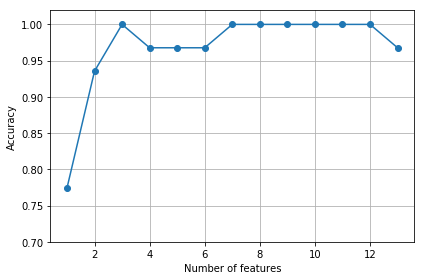

In [45]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [46]:
# 最小限の特徴部分集合k=3を調べる
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of siluted wines'], dtype='object')


In [47]:
knn.fit(X_train_std,y_train)
print('Training accuracy:',knn.score(X_train_std,y_train))

print('Test sccuracy:',knn.score(X_test_std,y_test))

Training accuracy: 0.967741935483871
Test sccuracy: 0.9814814814814815


In [48]:
knn.fit(X_train_std[:,k3],y_train)
print('Training accuracy:',knn.score(X_train_std[:,k3],y_train))
print('Test accuracy:',knn.score(X_test_std[:,k3],y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


## ランダムフォレストで特徴量の重要度にアクセスする

 1)Flavanoisds                    0.217871
 2)Proline                        0.200074
 3)Color intensity                0.135774
 4)Alcohol                        0.110444
 5)OD280/OD315 of siluted wines   0.100256
 6)Hue                            0.059663
 7)Total phenols                  0.047118
 8)Magnesium                      0.042043
 9)Malic acid                     0.021211
10)Proanthocyanins                0.020764
11)Alcalinity of ash              0.020062
12)Ash                            0.014593
13)Nonflavanoid phenols           0.010127


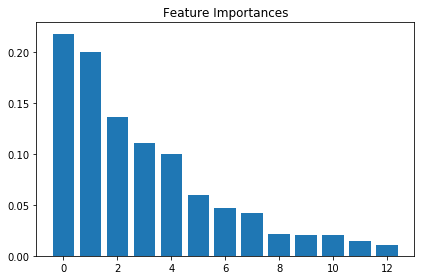

In [53]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=50,random_state=1)
forest.fit(X_train,y_train)

# 特徴量の重要度を抽出
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d)%-*s %f" %
         (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
    
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

## Scikit-learnのSelectFromModelクラス
このクラスでは、モデルを適合させた後にユーザーが指定したしきい値以上の重要度をもつ特徴量を選択する。これが役立つのは、scikit-learnのPipelineオブジェクトの特徴選択器と中間ステップとしてRandomForestClassifierを使用したい場合である。

In [54]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest,threshold=0.1,prefit=True)

# 特徴を抽出
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Flavanoisds                    0.217871
 2) Proline                        0.200074
 3) Color intensity                0.135774
 4) Alcohol                        0.110444
 5) OD280/OD315 of siluted wines   0.100256
